In [21]:
from sample.src.ustils import train_svi, visualize_parameters
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('.')
from argparse import Namespace
import pickle

import pyro
import torch
from sample.src.pgm import model, guide
from pyro.infer import  TraceEnum_ELBO

pyro.enable_validation(True)


import src.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/telepchu/PycharmProjects/project-1-telepchuk-maternik/venv/lib64/python3.7/site-packages/pyro/util.py:210: UserWarning: Found vars in model but not guide: {'Grade'}
  warnings.warn("Found vars in model but not guide: {}".format(model_vars - guide_vars - enum_vars))


Loss = 1935.6008911132812
Loss = 1814.1559448242188



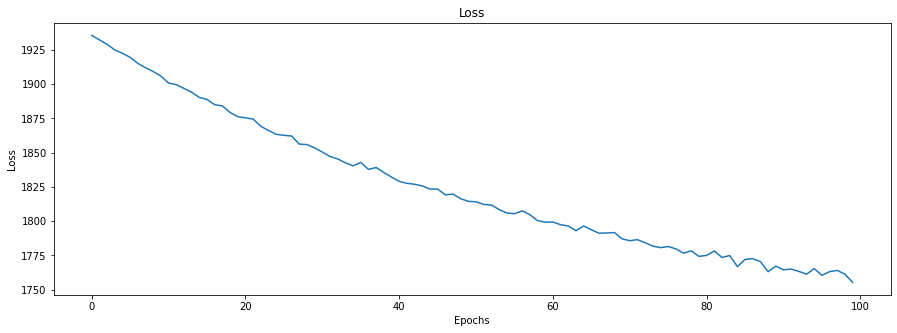

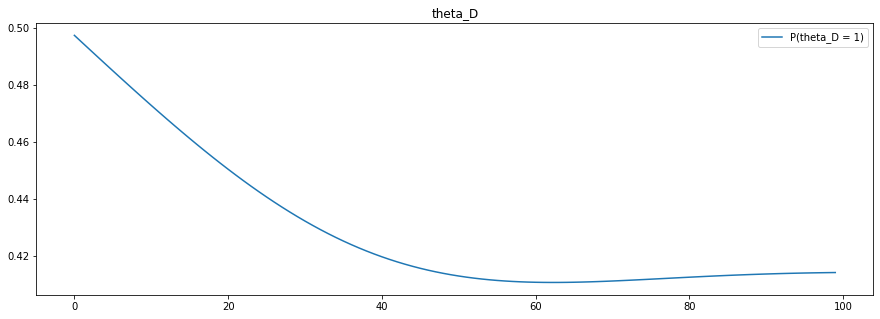

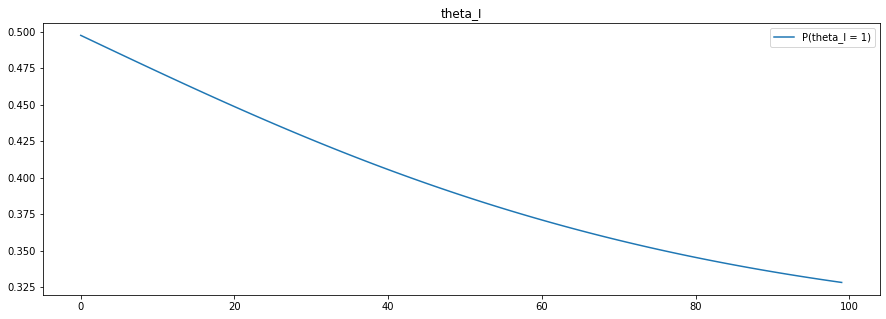

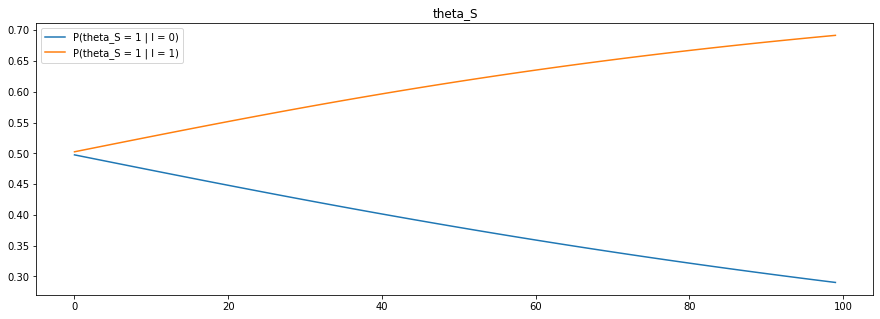

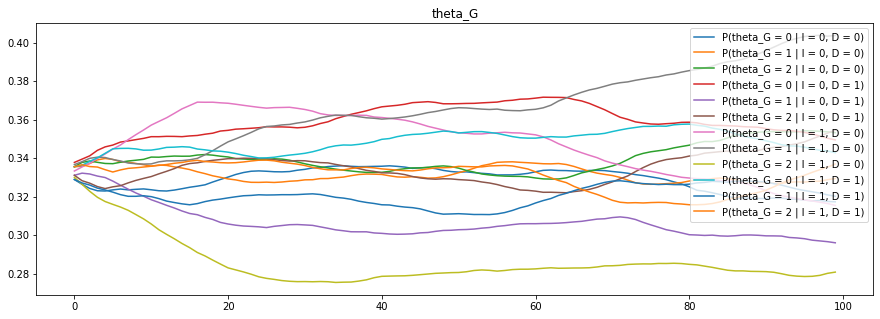

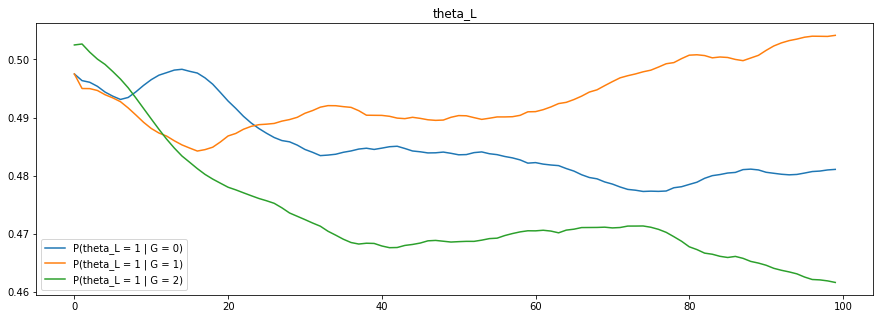

In [22]:

with open('data/pgm-student-data.pkl', 'rb') as fin:
    full_data = torch.tensor(pickle.load(fin), dtype=torch.float)

x = Namespace(
    d=full_data[:, 0],
    i=full_data[:, 1],

    s=full_data[:, 2],
    g=full_data[:, 3],

    l=full_data[:, 4],

    shape=full_data.shape,
)

pyro.clear_param_store()

elbo = TraceEnum_ELBO(max_plate_nesting=1)
elbo.loss(model, guide, x, True)

pyro.clear_param_store()

hist = train_svi(model=model, guide=guide, X=x, num_epochs=100, lr=1e-2)

visualize_parameters(hist)

In [23]:
marginals = elbo.compute_marginals(model, guide, x)
marginals['Grade'].log_prob(torch.tensor(1)).exp()

tensor([0.3447, 0.3152, 0.2828, 0.3887, 0.3447, 0.4198, 0.3350, 0.4198, 0.3447,
        0.3065, 0.3447, 0.2828, 0.3152, 0.3103, 0.4198, 0.3152, 0.3447, 0.2828,
        0.3103, 0.3447, 0.2828, 0.4198, 0.4198, 0.3447, 0.3152, 0.3447, 0.3152,
        0.3447, 0.3152, 0.3447, 0.3447, 0.4198, 0.2828, 0.4198, 0.2828, 0.3152,
        0.3103, 0.4198, 0.3152, 0.3065, 0.3350, 0.3447, 0.3447, 0.3447, 0.2828,
        0.3447, 0.3447, 0.3065, 0.3350, 0.3350, 0.2828, 0.3447, 0.3447, 0.3065,
        0.2828, 0.3152, 0.3350, 0.4198, 0.3447, 0.3152, 0.4198, 0.4198, 0.3152,
        0.3152, 0.3887, 0.3152, 0.3152, 0.3152, 0.3152, 0.3152, 0.3350, 0.4198,
        0.4198, 0.3152, 0.2828, 0.3152, 0.3103, 0.2828, 0.3152, 0.3447, 0.4198,
        0.3447, 0.3152, 0.3065, 0.3350, 0.3350, 0.2828, 0.2828, 0.2828, 0.3152,
        0.2828, 0.3152, 0.4198, 0.3065, 0.3103, 0.3152, 0.3103, 0.3065, 0.3447,
        0.3447, 0.3447, 0.3152, 0.3103, 0.3447, 0.3103, 0.2828, 0.4198, 0.2828,
        0.3447, 0.3152, 0.2828, 0.3447, 